<a href="https://colab.research.google.com/github/samsomsabu/machine_learning/blob/main/Component2_2348549.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#We are importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer
from scipy.stats import chi2_contingency

In [8]:
df = pd.read_csv('/content/2015 - 2015.csv')

In [9]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [10]:
#We use shape to get the details about the rows and columns.
#there are 158 rows and 12 columns
df.shape

(158, 12)

In [11]:
df.describe

<bound method NDFrame.describe of          Country                           Region  Happiness Rank  \
0    Switzerland                   Western Europe               1   
1        Iceland                   Western Europe               2   
2        Denmark                   Western Europe               3   
3         Norway                   Western Europe               4   
4         Canada                    North America               5   
..           ...                              ...             ...   
153       Rwanda               Sub-Saharan Africa             154   
154        Benin               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   
157         Togo               Sub-Saharan Africa             158   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              7.587         0.03411                   1.39651

In [12]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [13]:
#We are printing the different data types of the Dataset
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [14]:
#We are checking if there is the presence of any null values.
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

       Country  Happiness Rank  Happiness Score  Standard Error  \
0  Switzerland               1            7.587         0.03411   
1      Iceland               2            7.561         0.04884   
2      Denmark               3            7.527         0.03328   
3       Norway               4            7.522         0.03880   
4       Canada               5            7.427         0.03553   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.39651  1.34951                   0.94143  0.66557   
1                   1.30232  1.40223                   0.94784  0.62877   
2                   1.32548  1.36058                   0.87464  0.64938   
3                   1.45900  1.33095                   0.88521  0.66973   
4                   1.32629  1.32261                   0.90563  0.63297   

   Trust (Government Corruption)  Generosity  ...  \
0                        0.41978     0.29678  ...   
1                        0.14145     0.4

<ipython-input-15-2daf40a5bccf>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(one_hot.corr(), annot=True, cmap='coolwarm')


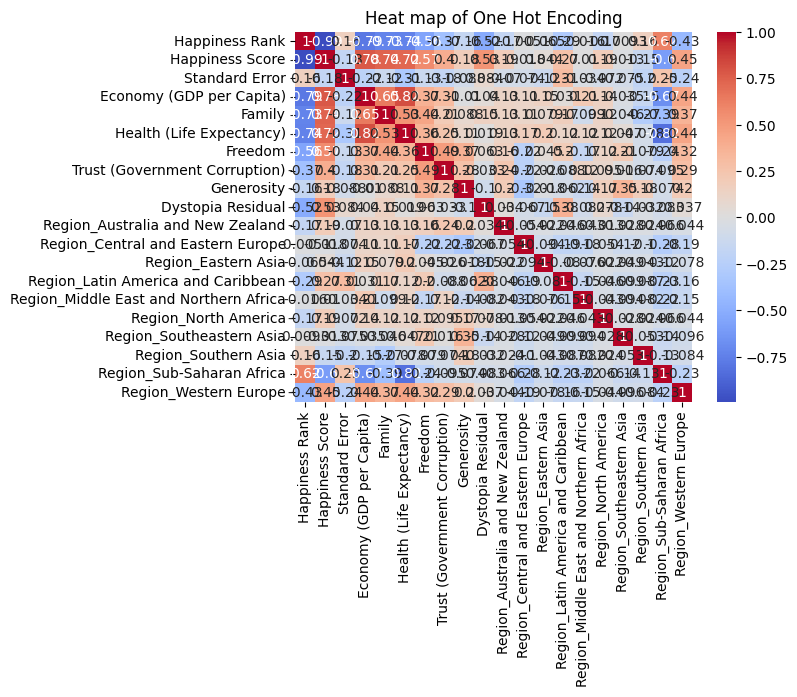

In [15]:

one_hot = pd.get_dummies(df, columns=['Region'])
print(one_hot.head())

#heatmap for the One Hot encoding
sns.heatmap(one_hot.corr(), annot=True, cmap='coolwarm')
plt.title('Heat map of One Hot Encoding')
plt.show()


In [16]:
#We are going to perform binning on the data
#We are choosing HappinessScore column from the table
feature_bin = df[['Happiness Score']]
bin_encoder = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
binned_feature = bin_encoder.fit_transform(feature_bin)
df['HappinessScore_Binned'] = binned_feature
#print(binned_feature)

In [17]:
#Visualization


In [18]:
#Covariance Matrix
numerical_columns = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)']
covariance_matrix = df[numerical_columns].cov()
print("Covariance Matrix for the Columns:")
print(covariance_matrix)

Covariance Matrix for the Columns:
                          Economy (GDP per Capita)    Family  \
Economy (GDP per Capita)                  0.162506  0.070852   
Family                                    0.070852  0.074185   
Health (Life Expectancy)                  0.081323  0.035741   

                          Health (Life Expectancy)  
Economy (GDP per Capita)                  0.081323  
Family                                    0.035741  
Health (Life Expectancy)                  0.061047  


In [20]:
#Performing Chi Square
one_hot_two = pd.get_dummies(df, columns=['Region', 'Happiness Rank'])
print(one_hot_two)
column1 = 'Region'
column2 = 'Happiness Rank'
contingency_table = pd.crosstab(one_hot[column1], one_hot[column2])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)


         Country  Happiness Score  Standard Error  Economy (GDP per Capita)  \
0    Switzerland            7.587         0.03411                   1.39651   
1        Iceland            7.561         0.04884                   1.30232   
2        Denmark            7.527         0.03328                   1.32548   
3         Norway            7.522         0.03880                   1.45900   
4         Canada            7.427         0.03553                   1.32629   
..           ...              ...             ...                       ...   
153       Rwanda            3.465         0.03464                   0.22208   
154        Benin            3.340         0.03656                   0.28665   
155        Syria            3.006         0.05015                   0.66320   
156      Burundi            2.905         0.08658                   0.01530   
157         Togo            2.839         0.06727                   0.20868   

      Family  Health (Life Expectancy)  Freedom  \


KeyError: ignored